In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [45]:
data_capital_lm = pd.read_csv('Dataset_clean.csv', index_col = 'Unnamed: 0')

<a id="13"></a>
## 13) Modelo de REGRESION LINEAL MULTIPLE
[Ir a índice](#indice)

In [46]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## INICIALMENTE VAMOS A REALIZAR UN ESTUDIO DE LAS FEATURES CATEGORICAS

#### 1) PLACE NAME

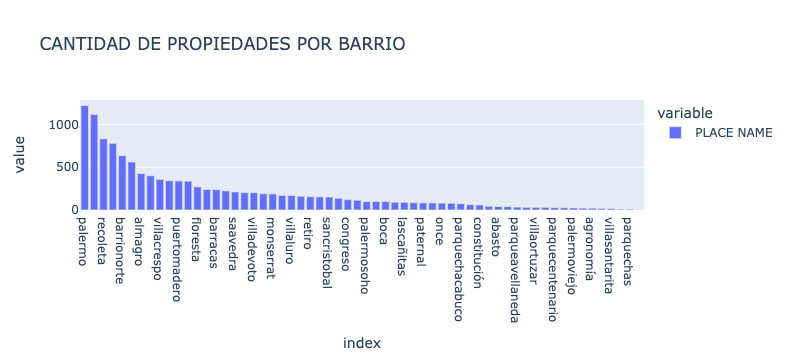

In [47]:
px.bar(data_capital_lm['PLACE NAME'].value_counts(), title='CANTIDAD DE PROPIEDADES POR BARRIO')

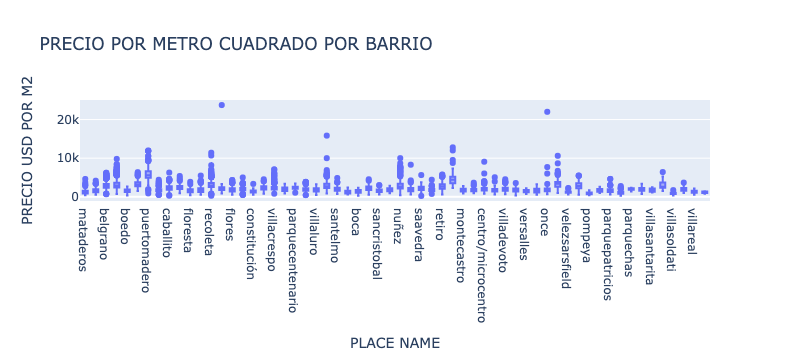

In [48]:
px.box(data_frame=data_capital_lm, x='PLACE NAME', y='PRECIO USD POR M2', title='PRECIO POR METRO CUADRADO POR BARRIO')

Podemos ver valores de precio usd por m2, bastante mayores al precio promedio del barrio, especialmente en chacarita y once

In [49]:
index_chacarita=data_capital_lm[data_capital_lm['PLACE NAME']=='chacarita'].sort_values('PRECIO USD POR M2', ascending=False)[:3].index
data_capital_lm[data_capital_lm['PLACE NAME']=='chacarita'].sort_values('PRECIO USD POR M2', ascending=False)[:3]
data_capital_lm=data_capital_lm.drop(index_chacarita[0])

In [50]:
index_once=data_capital_lm[data_capital_lm['PLACE NAME']=='once'].sort_values('PRECIO USD POR M2', ascending=False)[:3].index
data_capital_lm[data_capital_lm['PLACE NAME']=='once'].sort_values('PRECIO USD POR M2', ascending=False)[:3]
data_capital_lm=data_capital_lm.drop(index_once[0])

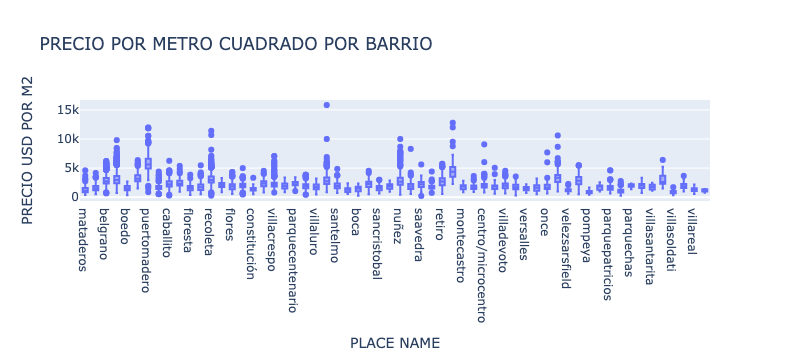

In [51]:
px.box(data_frame=data_capital_lm, x='PLACE NAME', y='PRECIO USD POR M2', title='PRECIO POR METRO CUADRADO POR BARRIO')

#### 2) TIPO DE PROPIEDAD

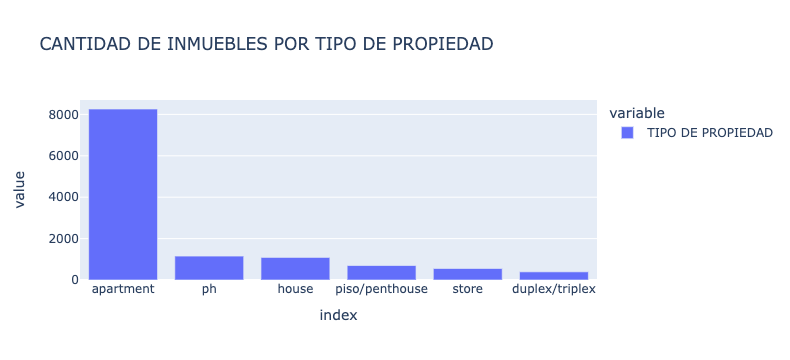

In [52]:
px.bar(data_capital_lm['TIPO DE PROPIEDAD'].value_counts(), title='CANTIDAD DE INMUEBLES POR TIPO DE PROPIEDAD')

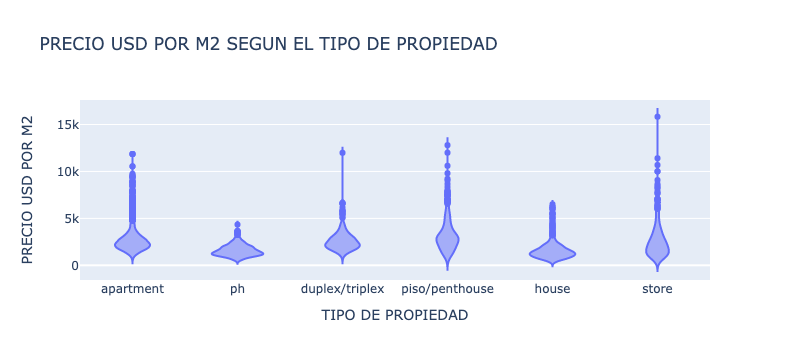

In [53]:
px.violin(data_frame = data_capital_lm, x='TIPO DE PROPIEDAD', y='PRECIO USD POR M2', title= "PRECIO USD POR M2 SEGUN EL TIPO DE PROPIEDAD")

#### 3) ZONAS COMUNALES

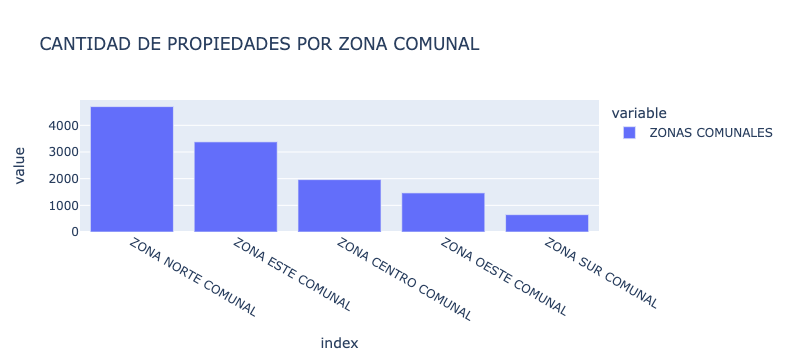

In [54]:
px.bar(data_capital_lm['ZONAS COMUNALES'].value_counts(), title = 'CANTIDAD DE PROPIEDADES POR ZONA COMUNAL')

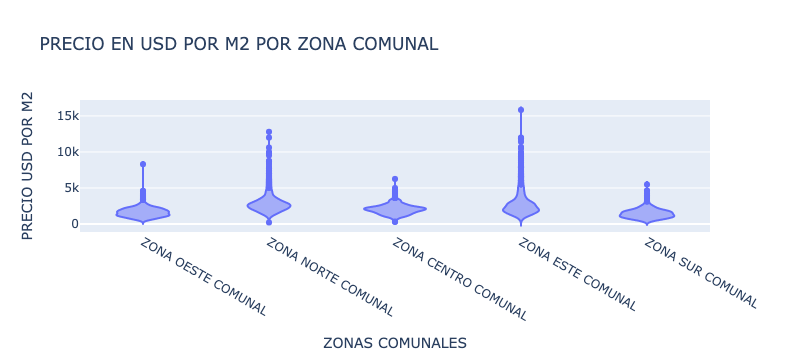

In [55]:
px.violin(data_frame = data_capital_lm, x='ZONAS COMUNALES', y='PRECIO USD POR M2', title='PRECIO EN USD POR M2 POR ZONA COMUNAL')

#### 

Ahora vamos a generar variables dummies, para las variables categoricas NOMINALES a partir de la funcion de pandas get_dummies:

   * PLACE NAME
    
   * TIPO DE PROPIEDAD
    
   * ZONAS COMUNALES

In [56]:
categoricas = data_capital_lm[['PLACE NAME', 'TIPO DE PROPIEDAD', 'ZONAS COMUNALES']]

features_categoricas_df = pd.get_dummies(categoricas, drop_first=True)

Unimos las features dummies generadas, con nuestro dataset de trabajo

In [57]:
data_capital_lm_con_cat = pd.concat([data_capital_lm,features_categoricas_df], axis=1)


In [58]:
data_capital_lm_con_cat.head()

PLACE NAME  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2     PRICE CURRENCY  \
0  mataderos               55.000000        1309.090909   72000.0      usd   
1    liniers              124.833333         761.014686   95000.0      usd   
2   belgrano               65.000000        3000.000000  195000.0      usd   
3  mataderos              140.000000        1707.142857  239000.0      usd   
4    palermo              104.000000        3365.384615  350000.0      usd   

   PRECIO USD TIPO DE PROPIEDAD  CANTIDAD     ZONAS COMUNALES  \
0     72000.0         apartment       1.0  ZONA OESTE COMUNAL   
1     95000.0                ph       1.0  ZONA OESTE COMUNAL   
2    195000.0         apartment       1.0  ZONA NORTE COMUNAL   
3    239000.0    duplex/triplex       1.0  ZONA OESTE COMUNAL   
4    350000.0         apartment       1.0  ZONA NORTE COMUNAL   

   ambientes_regex  parrilla_regex  cochera_regex  pileta_regex  sum_regex  \
0                2               0              0             0          0   
1                3               0              0             0          0   
2                2               0              0             1          0   
3                4               1              0             0          0   
4                0               0              0             0          0   

   solarium_regex  gym_regex  balcon_regex  jardin_regex  lavadero_regex  \
0               0          0             0             0               1   
1               0          0             0             0               0   
2               1          0             0             0               1   
3               0          0             0             0               0   
4               0          0             1             0               0   

   estrenar_regex  quincho_regex  patio_regex  PLACE NAME_agronomía  \
0               0              0            0                     0   
1               0              0            1                     0   
2               1              0            0                     0   
3               0              0            0                     0   
4               0              0            0                     0   

   PLACE NAME_almagro  PLACE NAME_balvanera  PLACE NAME_barracas  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   PLACE NAME_barrionorte  PLACE NAME_belgrano  PLACE NAME_boca  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    1                0   
3                       0                    0                0   
4                       0                    0                0   

   PLACE NAME_boedo  PLACE NAME_caballito  PLACE NAME_centro/microcentro  \
0                 0                     0                              0   
1                 0                     0                              0   
2                 0                     0                              0   
3                 0                     0                              0   
4                 0                     0                              0   

   PLACE NAME_chacarita  PLACE NAME_coghlan  PLACE NAME_colegiales  \
0                     0                   0                      0   
1                     0                   0                      0   
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   0                      0   

   PLACE NAME_congreso  PLACE NAME_constitución  PLACE NAME_flores  \
0                    0       

Ahora separamos las Features explicativas, de la variable Target (PRECIO USD POR M2) y creamos los sets de entrenamiento y testeo

In [59]:
X = data_capital_lm_con_cat.drop(['PRECIO USD','PRICE','PRECIO USD POR M2','PRECIO USD','PLACE NAME','CURRENCY','TIPO DE PROPIEDAD','ZONAS COMUNALES'], axis=1)
y = data_capital_lm_con_cat['PRECIO USD POR M2']

# Divido el set en test y entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1)

# Vamos a instanciar nuestro modelo de regression lineal
lm = linear_model.LinearRegression()
# Vamos a entrenar nuestro modelo con los datos de train
model_1 = lm.fit(X_train, y_train)
# Vamos a ver que r2 tiene
r2_score_1 = model_1.score(X_test,y_test)
r2_score_1

0.5927480745870571

In [60]:
r2_score_set_entrenamiento_1 = model_1.score(X_train,y_train)
r2_score_set_entrenamiento_1

0.5881429677582211

In [61]:
# Imprimimos el intercepto de nuestro modelo
model_1.intercept_

2182.1594954192906

In [62]:
# Imprimimos los valores de los coeficientes de cada Feature de nuestro modelo
model_1.coef_

array([-2.78388302e+00,  2.63310085e-09, -2.15454077e+01, -8.34018903e+00,
        3.89026207e+02,  2.59653391e+02,  1.22579436e+01, -5.50823132e+01,
        4.07029765e+02,  4.40536879e-02,  8.79914188e+01,  1.74171460e+01,
        8.17946766e+01,  9.99459376e+01, -2.15737148e+02, -5.07824808e+02,
        1.24569735e+02, -1.28227310e+02,  2.80607695e+02,  9.41527674e+02,
        2.95106692e+02, -1.95033068e-01, -2.55716410e+02,  2.97115686e+02,
        3.14156068e+02, -4.48934751e+02, -3.66818531e+02, -1.37883450e+02,
       -1.37301960e+01, -3.58004104e+02, -1.45547474e+02, -9.89723084e+01,
        7.13094078e+02, -8.55636300e+01, -2.50414426e+02, -2.23582389e+00,
        1.37429942e+02,  3.30922636e+02,  8.95832186e+01,  5.00264414e+02,
        1.89525770e+03,  6.53633250e+02,  3.99635384e+02,  4.25655188e+02,
       -3.85814111e+02,  3.38178135e+02, -2.10911634e+02, -5.87755818e+02,
        2.09461967e+02, -6.27272919e+02, -2.81290677e+02,  3.33068017e+03,
        1.11688536e+03,  

## VAMOS A HACER UN ANALISIS CON STATSMODELS DE LAS VARIABLES EXPLICATIVAS

In [63]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PRECIO USD POR M2   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     165.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:33:41   Log-Likelihood:                -73723.
No. Observations:                9121   AIC:                         1.476e+05
Df Residuals:                    9042   BIC:                         1.482e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
SUPERFICIE TOTAL EN M2                -2.7839      0.140    -19.912      0.000      -3.058      -2.510
CANTIDAD                            1979.2353     32.938     60.090      0.000    1914.670    2043.800
ambientes_regex                      -21.5454      5.087     -4.235      0.000     -31.517     -11.574
parrilla_regex                        -8.3402     24.134     -0.346      0.730     -55.649      38.969
cochera_regex                        389.0262     19.991     19.460      0.000     349.839     428.213
pileta_regex                         259.6534     33.099      7.845      0.000     194.771     324.535
sum_regex                             12.2579     29.839      0.411      0.681     -46.232      70.748
solarium_regex                       -55.0823     38.062     -1.447      0.148    -129.693      19.529
gym_regex                            407.0298     40.237     10.116      0.000     328.157     485.903
balcon_regex                           0.0441     18.714      0.002      0.998     -36.640      36.728
jardin_regex                          87.9914     32.426      2.714      0.007      24.429     151.554
lavadero_regex                        17.4171     17.917      0.972      0.331     -17.705      52.539
estrenar_regex                        81.7947     35.723      2.290      0.022      11.769     151.821
quincho_regex                         99.9459     41.034      2.436      0.015      19.510     180.381
patio_regex                         -215.7371     23.440     -9.204      0.000    -261.685    -169.789
PLACE NAME_agronomía                -497.6786    201.488     -2.470      0.014    -892.641    -102.716
PLACE NAME_almagro                   327.4939     48.054      6.815      0.000     233.297     421.691
PLACE NAME_balvanera                -128.2273    157.304     -0.815      0.415    -436.579     180.125
PLACE NAME_barracas                  305.9732     83.537      3.663      0.000     142.222     469.725
PLACE NAME_barrionorte               941.5277    153.672      6.127      0.000     640.295    1242.760
PLACE NAME_belgrano                  305.2529     37.498      8.141      0.000     231.749     378.756
PLACE NAME_boca                       25.1705    104.574      0.241      0.810    -179.819     230.160
PLACE NAME_boedo                     -52.7922     88.495     -0.597      0.551    -226.263     120.678
PLACE NAME_caballito                 500.0399     39.699     12.596      0.000     422.220     577.860
PLACE NAME_centro/microcentro        314.1561    178.890      1.756      0.079     -36.508     664.820
PLACE NAME_chacarita                -438.7885    118.733     -3.696      0.000    -671.532    -206.045
PLACE NAME_coghlan                  -356.6723    100.426     -3.552      0.000    -553.530    -1

##### **Con statsmodel, podemos hacer un analisis mas detallado del aporte de cada feature al modelo, y podemos distinguir aquellas que son estadisticamente significativas, de las que no. Aquellas con un p-value(P>|t|) > 0.05, no pueden asegurar una relacion con la variable target (PRECIO USD POR M2), ya que no rechazan la hipotesis nula y es posible que su asociacion con la variable target, sea simplemente consecuencia del azar.**

##### **Por lo tanto, features como por ejemplo lavadero_regex,  parrilla_regex, PLACE NAME_villareal, etc desde el punto de vista del análisis estadístico y de la explicación de la influencia de cada parámetro, no podemos asegurar, con una confianza del 95%, que la 'influencia' que ese parámetro tiene en el target sea la que dice el beta correspondiente. Esto es así, porque al no poder rechazar la hipótesis nula implica que no podemos asegurar que ese valor encontrado no tenga una influencia aleatoria que lo haga estadísticamente no significativo, dentro del intervalo de confianza propuesto. Aun asi, cabe destacar, que a los fines predictivos, podemos usar todas las variables, en la medida en que nos ayuden a mejorar el R2.**

## VAMOS AHORA A INTENTAR MEJORAR EL MODELO

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

X_train_poly,X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)

model_2 = lm.fit(X_train_poly, y_train_poly)

r2_score_2_test = model_2.score(X_test_poly, y_test_poly)
r2_score_2_train = model_2.score(X_train_poly, y_train_poly)

print('El valor del R2 para test es: ', r2_score_2_test)
print('El valor del R2 para train es: ', r2_score_2_train)

El valor del R2 para test es:  -16755.750574466954
El valor del R2 para train es:  0.6884242531006715


Podemos ver que nos devuelve un valor de r2 negativo, o sea que generaliza peor que la media. Estamos cometiendo un error de Overfitting, ya que generaliza con un r2 muy alto para el set de train, pero un r2 incluso peor que la media para el set de testeo.

Vamos a intentar mejorar esto aplicando tecnicas de REGULARIZACION

## REGULARIZACION

### ESTANDARIZAMOS NUESTRAS FEATURES

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler().fit(X_train_poly)
X_train_standarized = scaler.transform(X_train_poly)
X_test_standarized = scaler.transform(X_test_poly)

### REGULARIZACION RIDGE

In [68]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True, random_state=1)

In [69]:
lm_ridge = linear_model.RidgeCV(alphas=np.linspace(10,200,10), cv=kf)

model_3 = lm_ridge.fit(X_train_standarized, y_train_poly)
r2_score_3_test = model_3.score(X_test_standarized, y_test_poly)
r2_score_3_test

0.6187169665719465

In [70]:
# Podemos observar que aprendio bien de los datos de entrenamiento, pero no overfittea
r2_score_3_train = model_3.score(X_train_standarized, y_train_poly)
r2_score_3_train

0.685402179405408

In [71]:
model_3.alpha_

200.0

### REGULARIZACION LASSO

In [72]:
lm_lasso = linear_model.LassoCV(alphas=[0.05, 0.1, 1, 5, 10, 15, 25], cv=kf, max_iter=100000)
model_4 = lm_lasso.fit(X_train_standarized, y_train_poly)
r2_score_4_test = model_4.score(X_test_standarized, y_test_poly)
r2_score_4_test

0.6334354321056784

In [73]:
r2_score_4_train = model_4.score(X_train_standarized, y_train_poly)
r2_score_4_train

0.6639749263217241

In [74]:
model_4.alpha_

5.0

### REGULARIZACION ELASTICNET

In [75]:
for x in np.arange(0.1,1,0.4):
    lm_elasticnet = linear_model.ElasticNetCV(l1_ratio=x, cv=kf, max_iter=10000)
    model_5 = lm_elasticnet.fit(X_train_standarized, y_train_poly)
    r2_score_5_test=model_5.score(X_test_standarized, y_test_poly)
    r2_score_5_train=model_5.score(X_train_standarized, y_train_poly)
    print('R2_score',r2_score_5_test.round(3),'ElasticNet con L1_ratio de ',x)
    print('ALPHA =',model_5.alpha_)

R2_score 0.51 ElasticNet con L1_ratio de  0.1
ALPHA = 5.52975651324215
R2_score 0.6 ElasticNet con L1_ratio de  0.5
ALPHA = 1.10595130264843
R2_score 0.614 ElasticNet con L1_ratio de  0.9
ALPHA = 2.3132420332832484


**Por lo tanto el mejor Ratio es L1_ratio=0.9, que seria una Regression con mucho mayor aporte de la penalizacion Lasso, que Ridge**

¿Cómo son las performances entre los modelos regularizados y no regularizado? 

In [76]:
print ('El modelo sin regularizar, utilizando todas las features, ya codificadas: R2=' ,r2_score_1)
print()
print ('Al querer complejizar el modelo para aumentar su R2, haciendo feature engineering a partir de operaciones y combinaciones de las features, generadas a partir de la funcion "PolynomialFeatures()",observamos un pesimo R2 =' ,r2_score_2_test)
print('Teniendo en cuenta que el R2 del set de entrenamiento tiene un valor R2=',r2_score_2_train,', Si bien no es tan alto, podemos entender que estamos cometiendo error de OVERFITTING en el modelo')
print()
print('Aplicando REGULARIZACION, obtenemos un R2_Ridge = ',r2_score_3_test)
print()
print('Confirmando que no tenemos overfitting, dado que R2_train =',r2_score_3_train)
print()
print('Aplicando REGULARIZACION, obtenemos un R2_Lasso = ',r2_score_4_test)
print()
print('Confirmando que no tenemos overfitting, dado que R2_train =',r2_score_4_train)
print()
print('Aplicando REGULARIZACION, obtenemos un R2_ElasticNet = ',r2_score_5_test)
print()
print('Confirmando que no tenemos overfitting, dado que R2_train =',r2_score_5_train)

El modelo sin regularizar, utilizando todas las features, ya codificadas: R2= 0.5927480745870571

Al querer complejizar el modelo para aumentar su R2, haciendo feature engineering a partir de operaciones y combinaciones de las features, generadas a partir de la funcion "PolynomialFeatures()",observamos un pesimo R2 = -16755.750574466954
Teniendo en cuenta que el R2 del set de entrenamiento tiene un valor R2= 0.6884242531006715 , Si bien no es tan alto, podemos entender que estamos cometiendo error de OVERFITTING en el modelo

Aplicando REGULARIZACION, obtenemos un R2_Ridge =  0.6187169665719465

Confirmando que no tenemos overfitting, dado que R2_train = 0.685402179405408

Aplicando REGULARIZACION, obtenemos un R2_Lasso =  0.6334354321056784

Confirmando que no tenemos overfitting, dado que R2_train = 0.6639749263217241

Aplicando REGULARIZACION, obtenemos un R2_ElasticNet =  0.6138798578863884

Confirmando que no tenemos overfitting, dado que R2_train = 0.656699787950944


## CUESTIONARIO

1) ¿Cuál funciona mejor? 


Si bien la Regression Ridge y Lasso, dan R2_score muy similares, la que mejor funciona es la Regularizacion Lasso, al modelo que previamente se le aplico feature engineering y estandarizacion.

2) ¿Qué hace una regresión Ridge? 

La regresion Ridge, busca sacrificar un poco de cesgo de nuestro modelo, con el fin de reducir la variabilidad de los datos predichos, agregando a la funcion de costo de la regresion lineal (minimos cuadrados), un termino de penalizacion, cuya intensidad depende del valor de una constante ALPHA. Este ALPHA multiplica a la suma de los coeficientes Betas de cada feature elevados al cuadrado (NORMALIZACION L2), sin incluir el parametro del intercepto del modelo

3) ¿Y una LASSO? 

Es muy similar a la Regresion Ridge, con la salvedad que la LASSO, logra llevar a 0 parametros Beta, que no tengan relacion con la variable target, cuando el valor de ALPHA es muy grande. En el caso de la regresion Ridge, esto no se consigue, sin importar que tan grande sea ALPHA. En el caso donde tengamos Features que esten muy correlacionadas, la Regresion Lasso, escogera una de ellas, y a las demas las hara valer 0, mientras que la Regression Ridge, distribuira la penalizacion de los Betas, equitativamente entre ellas, pero nunca eliminara ninguna. Ademas, en el caso de la regresion LASSO, el parametro ALPHA de penalizacion, multiplica a la suma del valor absoluto de los coeficientes Beta de cada feature, sin incluir el parametro del intercepto del modelo.


4) ¿Qué diferencias hay con la regresión lineal sin regularizar?

Si el valor del parametro penalizador "ALPHA", fuera 0, el modelo es el mismo que sin regularizar. La regression Lineal busca minimizar el valor de los residuos del modelo, en cambio al regularizar, le sumamos un nuevo termino, que se compone del parametro ALPHA, multiplicado por la suma de los betas al cuadro o aplicandole el modulo a los mismos, dependiendo el tipo de regularizacion.

### Seleccionar mediante muestreo aleatorio simple una submuestra de 100 propiedades.

In [77]:
data_capital_100 = data_capital_lm_con_cat.sample(100, random_state=1)
data_capital_100.head(3)

PLACE NAME  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2     PRICE  \
4404        balvanera               83.650224        2510.453522  210000.0   
2978  parquepatricios               75.644444        1388.072855  105000.0   
4089      barrionorte               94.000000        2978.723404  280000.0   

     CURRENCY  PRECIO USD TIPO DE PROPIEDAD  CANTIDAD    ZONAS COMUNALES  \
4404      usd    210000.0         apartment       1.0  ZONA ESTE COMUNAL   
2978      usd    105000.0         apartment       1.0   ZONA SUR COMUNAL   
4089      usd    280000.0         apartment       1.0  ZONA ESTE COMUNAL   

      ambientes_regex  parrilla_regex  cochera_regex  pileta_regex  sum_regex  \
4404                4               0              0             0          1   
2978                3               0              0             0          0   
4089                4               0              0             0          0   

      solarium_regex  gym_regex  balcon_regex  jardin_regex  lavadero_regex  \
4404               0          0             1             0               1   
2978               0          0             1             0               0   
4089               0          0             1             0               0   

      estrenar_regex  quincho_regex  patio_regex  PLACE NAME_agronomía  \
4404               0              0            0                     0   
2978               0              0            0                     0   
4089               0              0            0                     0   

      PLACE NAME_almagro  PLACE NAME_balvanera  PLACE NAME_barracas  \
4404                   0                     1                    0   
2978                   0                     0                    0   
4089                   0                     0                    0   

      PLACE NAME_barrionorte  PLACE NAME_belgrano  PLACE NAME_boca  \
4404                       0                    0                0   
2978                       0                    0                0   
4089                       1                    0                0   

      PLACE NAME_boedo  PLACE NAME_caballito  PLACE NAME_centro/microcentro  \
4404                 0                     0                              0   
2978                 0                     0                              0   
4089                 0                     0                              0   

      PLACE NAME_chacarita  PLACE NAME_coghlan  PLACE NAME_colegiales  \
4404                     0                   0                      0   
2978                     0                   0                      0   
4089                     0                   0                      0   

      PLACE NAME_congreso  PLACE NAME_constitución  PLACE NAME_flores  \
4404                    0                        0                  0   
2978                    0                        0                  0   
4089                    0                        0                  0   

      PLACE NAME_floresta  PLACE NAME_lascañitas  PLACE NAME_liniers  \
4404                    0                      0                   0   
2978                    0                      0                   0   
4089                    0                      0                   0   

      PLACE NAME_mataderos  PLACE NAME_monserrat  PLACE NAME_montecastro  \
4404                     0                     0                       0   
2978                     0                     0                       0   
4089                     0                     0                       0   

      PLACE NAME_nuñez  PLACE NAME_once  PLACE NAME_palermo  \
4404                 0                0                   0   
2978                 0                0                   0   
4089                 0                0                   0   

      PLACE NAME_palermochico  PLACE NAME_palermohollywood  \
4404                        0                            0   
2978          

In [78]:
## Ahora de esta muestra, filtramos los departamentos
data_capital_100_depto = data_capital_100[data_capital_100['TIPO DE PROPIEDAD']=='apartment']
data_capital_100_depto_clean = data_capital_100_depto.drop(['PRECIO USD','PRICE','PRECIO USD POR M2','PRECIO USD','PLACE NAME','CURRENCY','TIPO DE PROPIEDAD','ZONAS COMUNALES'], axis=1)

In [79]:
X_poly_100 = poly.transform(data_capital_100_depto_clean)
X_poly_100_std = scaler.transform(X_poly_100)

In [80]:
PRECIO_USD_POR_M2_predicho = model_4.predict(X_poly_100_std)
PRECIO_USD_POR_M2_predicho

array([1658.63194251, 1675.49218348, 2598.15272276, 2491.88277236,
       1937.76853642, 5654.95223495, 2113.12552484, 2784.04405151,
       2302.47317029, 2061.27827582, 1884.00344737, 2764.73490328,
       1730.62291268, 5484.74577141, 3214.4948901 , 3317.46870855,
       2335.06231329, 3312.62412011, 2178.13261195, 1718.98674873,
       1799.77991204, 1898.79405135, 2105.54637734, 2208.96406966,
       2353.06478961, 3945.5485463 , 3005.39121668, 2065.11992839,
       3795.60022841, 2125.53853168, 1747.3911734 , 3533.55199975,
       2762.89589642, 3774.69923192, 1684.50339373, 2804.23345781,
       2974.39818666, 3740.38726587, 2131.45388542, 2872.9312943 ,
       2761.37910957, 2049.82202285, 5717.38926444, 2057.90421589,
       2038.94222953, 3362.6143418 , 3590.30239897, 6004.55506595,
       2425.65760197, 3067.78522119, 2928.0141127 , 4032.05150049,
       2015.59012496, 2034.80291702, 2574.82117981, 2015.20830716,
       2043.75904311, 2009.04441147, 2888.44107442, 3509.58515

In [81]:
data_capital_100_depto['PRECIO USD POR M2 PREDICHO'] = PRECIO_USD_POR_M2_predicho
data_capital_100_depto['PRECIO USD MODELO']=data_capital_100_depto['PRECIO USD POR M2 PREDICHO']*data_capital_100_depto['SUPERFICIE TOTAL EN M2']
data_capital_100_depto['RESIDUO'] = data_capital_100_depto['PRECIO USD POR M2 PREDICHO'] - data_capital_100_depto['PRECIO USD POR M2'] 
data_capital_100_depto['GANANCIA'] = data_capital_100_depto['RESIDUO']*data_capital_100_depto['SUPERFICIE TOTAL EN M2']

data_capital_100_depto.head()

<ipython-input-81-f6834ef1e793>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f6834ef1e793>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f6834ef1e793>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f6834ef

PLACE NAME  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2     PRICE  \
4404         balvanera               83.650224        2510.453522  210000.0   
2978   parquepatricios               75.644444        1388.072855  105000.0   
4089       barrionorte               94.000000        2978.723404  280000.0   
12109      barrionorte              102.478958        1170.972095  120000.0   
6965          floresta               75.796610        1385.286225  105000.0   

      CURRENCY  PRECIO USD TIPO DE PROPIEDAD  CANTIDAD     ZONAS COMUNALES  \
4404       usd    210000.0         apartment       1.0   ZONA ESTE COMUNAL   
2978       usd    105000.0         apartment       1.0    ZONA SUR COMUNAL   
4089       usd    280000.0         apartment       1.0   ZONA ESTE COMUNAL   
12109      usd    120000.0         apartment       1.0   ZONA ESTE COMUNAL   
6965       usd    105000.0         apartment       1.0  ZONA OESTE COMUNAL   

       ambientes_regex  parrilla_regex  cochera_regex  pileta_regex  \
4404                 4               0              0             0   
2978                 3               0              0             0   
4089                 4               0              0             0   
12109                3               0              0             0   
6965                 0               0              0             0   

       sum_regex  solarium_regex  gym_regex  balcon_regex  jardin_regex  \
4404           1               0          0             1             0   
2978           0               0          0             1             0   
4089           0               0          0             1             0   
12109          0               0          0             0             0   
6965           0               0          0             1             1   

       lavadero_regex  estrenar_regex  quincho_regex  patio_regex  \
4404                1               0              0            0   
2978                0               0              0            0   
4089                0               0              0            0   
12109               1               0              0            0   
6965                1               0              0            0   

       PLACE NAME_agronomía  PLACE NAME_almagro  PLACE NAME_balvanera  \
4404                      0                   0                     1   
2978                      0                   0                     0   
4089                      0                   0                     0   
12109                     0                   0                     0   
6965                      0                   0                     0   

       PLACE NAME_barracas  PLACE NAME_barrionorte  PLACE NAME_belgrano  \
4404                     0                       0                    0   
2978                     0                       0                    0   
4089                     0                       1                    0   
12109                    0                       1                    0   
6965                     0                       0                    0   

       PLACE NAME_boca  PLACE NAME_boedo  PLACE NAME_caballito  \
4404                 0                 0                     0   
2978                 0                 0                     0   
4089                 0                 0                     0   
12109                0                 0                     0   
6965                 0                 0                     0   

       PLACE NAME_centro/microcentro  PLACE NAME_chacarita  \
4404                               0                     0   
2978                               0                     0   
4089                               0                     0   
12109                              0                     0   
6965                               0                     0   

       PLACE NAME_coghlan  PLACE NAME_colegiales  PLACE NAME_congreso  \
4404                    0                 

## Teniendo en cuenta que podría comprar y vender propiedades al precio de mercado (omitamos costos de transacción), ¿cuál/es de las propiedades de su portfolio representan una buena oportunidad para comprar y luego vender a un mejor precio? 

In [82]:
dptos_subvaluados_OPORTUNIDAD_COMPRA = data_capital_100_depto[data_capital_100_depto['RESIDUO'] > 0]
dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False).head()

PLACE NAME  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2      PRICE  \
10708        retiro               95.000000        1121.673474  1900000.0   
2246   puertomadero              109.000000        3669.724771   400000.0   
4105        palermo               96.202516        1871.052941   180000.0   
12109   barrionorte              102.478958        1170.972095   120000.0   
3494          nuñez               84.232558        2730.535616   230000.0   

      CURRENCY  PRECIO USD TIPO DE PROPIEDAD  CANTIDAD     ZONAS COMUNALES  \
10708      ars   106558.98         apartment       1.0   ZONA ESTE COMUNAL   
2246       usd   400000.00         apartment       1.0   ZONA ESTE COMUNAL   
4105       usd   180000.00         apartment       1.0  ZONA NORTE COMUNAL   
12109      usd   120000.00         apartment       1.0   ZONA ESTE COMUNAL   
3494       usd   230000.00         apartment       1.0  ZONA NORTE COMUNAL   

       ambientes_regex  parrilla_regex  cochera_regex  pileta_regex  \
10708                0               0              1             0   
2246                 0               0              1             0   
4105                 0               1              1             1   
12109                3               0              0             0   
3494                 2               0              1             1   

       sum_regex  solarium_regex  gym_regex  balcon_regex  jardin_regex  \
10708          1               0          0             1             0   
2246           0               0          0             1             0   
4105           0               0          0             1             0   
12109          0               0          0             0             0   
3494           1               1          0             1             0   

       lavadero_regex  estrenar_regex  quincho_regex  patio_regex  \
10708               0               0              0            0   
2246                1               0              0            0   
4105                1               0              0            0   
12109               1               0              0            0   
3494                1               0              0            0   

       PLACE NAME_agronomía  PLACE NAME_almagro  PLACE NAME_balvanera  \
10708                     0                   0                     0   
2246                      0                   0                     0   
4105                      0                   0                     0   
12109                     0                   0                     0   
3494                      0                   0                     0   

       PLACE NAME_barracas  PLACE NAME_barrionorte  PLACE NAME_belgrano  \
10708                    0                       0                    0   
2246                     0                       0                    0   
4105                     0                       0                    0   
12109                    0                       1                    0   
3494                     0                       0                    0   

       PLACE NAME_boca  PLACE NAME_boedo  PLACE NAME_caballito  \
10708                0                 0                     0   
2246                 0                 0                     0   
4105                 0                 0                     0   
12109                0                 0                     0   
3494                 0                 0                     0   

       PLACE NAME_centro/microcentro  PLACE NAME_chacarita  \
10708                              0                     0   
2246                               0                     0   
4105                               0                     0   
12109                              0                     0   
3494                               0                     0   

       PLACE NAME_coghlan  PLACE NAME_colegiales  PLACE NAME_congreso  \
10708                   0                      0   

In [83]:
data_capital_lm.loc[[10708,2246]]

PLACE NAME  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2      PRICE  \
10708        retiro                    95.0        1121.673474  1900000.0   
2246   puertomadero                   109.0        3669.724771   400000.0   

      CURRENCY  PRECIO USD TIPO DE PROPIEDAD  CANTIDAD    ZONAS COMUNALES  \
10708      ars   106558.98         apartment       1.0  ZONA ESTE COMUNAL   
2246       usd   400000.00         apartment       1.0  ZONA ESTE COMUNAL   

       ambientes_regex  parrilla_regex  cochera_regex  pileta_regex  \
10708                0               0              1             0   
2246                 0               0              1             0   

       sum_regex  solarium_regex  gym_regex  balcon_regex  jardin_regex  \
10708          1               0          0             1             0   
2246           0               0          0             1             0   

       lavadero_regex  estrenar_regex  quincho_regex  patio_regex  
10708               0               0              0            0  
2246                1               0              0            0

##### **Podriamos, por ejemplo, comprar el departamento ubicado en Retiro de 95m2, con cochera, balcon y sum, por un precio usd por m2 de 1121.67, y luego venderla a 3313.73, con una ganancia de 2192 usd/m2 (U$D 208.240)**

##### **podriamos tambien, por ejemplo, comprar el departamento ubicado en puerto madero de 109m2, con cochera, balcon y lavadero, por un precio usd por m2 de 3669.72, y luego venderlo a 5655.21, con una ganancia de 1985.48 usd/m2 (U$D 216417.46)**

#### CONCLUSION:

###### **Si por ejemplo tomasemos los 5 departamentos mas subvaluados, con una inversion de USD 1.036.558,98, se podria obtener USD 1.616.210,56, esto es casi un 56 % de rentabilidad.**


## VISUALIZACIONES

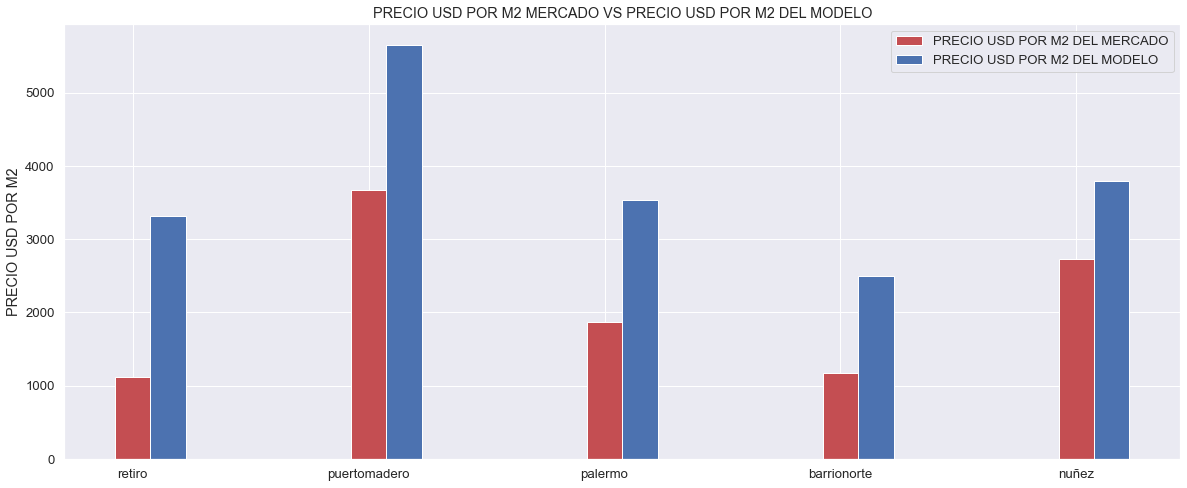

In [84]:
PRECIO_M2=dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False)['PRECIO USD POR M2'].head().values
PRECIO_M2_PREDICHO=dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False)['PRECIO USD POR M2 PREDICHO'].head().values
BARRIOS = dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False)['PLACE NAME'].head().values

ind = np.arange(5) # crea la lista con numeros entre 0 y 4
width = 0.15 # ancho de las barras

fig = plt.figure(figsize=(20,8)); ax = plt.axes()
ax.bar(ind+ 0.00, PRECIO_M2, width, color='r') # barra roja. 
ax.bar(ind+ 0.15, PRECIO_M2_PREDICHO, width, color='b') # barra azul 

ax.set_ylabel('PRECIO USD POR M2'); ax.set_title('PRECIO USD POR M2 MERCADO VS PRECIO USD POR M2 DEL MODELO')
ax.set_xticks(ind); ax.set_xticklabels(BARRIOS)
ax.legend(labels=['PRECIO USD POR M2 DEL MERCADO', 'PRECIO USD POR M2 DEL MODELO'])
# sns.set(font_scale = 0.7)
plt.show()

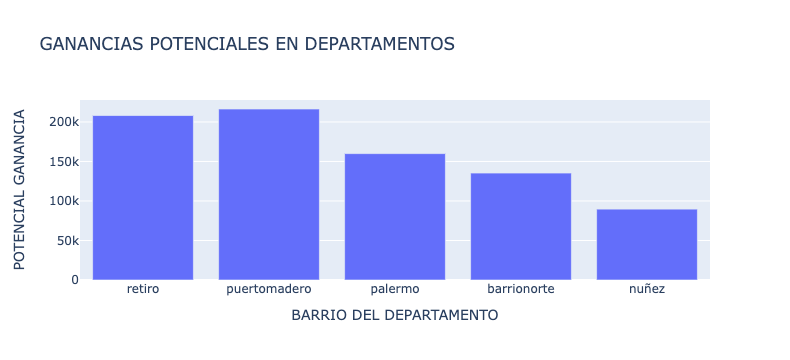

In [85]:
GANANCIA = dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False)['GANANCIA'].head().values
BARRIOS = dptos_subvaluados_OPORTUNIDAD_COMPRA.sort_values('RESIDUO', ascending = False)['PLACE NAME'].head().values

df_visualizacion = pd.DataFrame({'POTENCIAL GANANCIA':GANANCIA,'BARRIO DEL DEPARTAMENTO':BARRIOS})
px.bar(data_frame=df_visualizacion,x='BARRIO DEL DEPARTAMENTO', y='POTENCIAL GANANCIA', title = 'GANANCIAS POTENCIALES EN DEPARTAMENTOS')

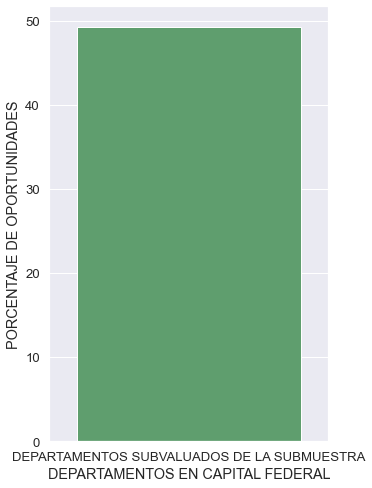

In [86]:
# PORCENTAJE DE DEPARTAMENTOS SOBREVALUADOS Y SUBVALUADOS

porcentaje_de_oportunidades=(data_capital_100_depto['RESIDUO'] > 0).sum()/data_capital_100_depto.shape[0]*100
porcentaje_de_oportunidades

a=pd.DataFrame({'PORCENTAJE DE OPORTUNIDADES':porcentaje_de_oportunidades, 'DEPARTAMENTOS EN CAPITAL FEDERAL':'DEPARTAMENTOS SUBVALUADOS DE LA SUBMUESTRA'}, index=np.arange(1))
fig = plt.figure(figsize=(5,8)); ax = plt.axes()
sns.set(font_scale = 1.2)

fig=sns.barplot(data=a,x='DEPARTAMENTOS EN CAPITAL FEDERAL' , y='PORCENTAJE DE OPORTUNIDADES', color='g')